In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
src = cv2.imread('./data/cropland.png')

x, y, w, h = cv2.selectROI(src)

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
crop = src_ycrcb[y:y+h, x:x+w]

channels = [1, 2]
cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]
cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range

hist = cv2.calcHist([crop], channels, None, histSize, ranges)
hist_norm = cv2.normalize(cv2.log(hist+1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)
dst = cv2.copyTo(src, backproj)

cv2.imshow('backproj', backproj)
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


In [6]:
ref = cv2.imread('./data/kids1.png', cv2.IMREAD_COLOR)
mask = cv2.imread('./data/kids1_mask.png', cv2.IMREAD_GRAYSCALE)

ref_ycrcb = cv2.cvtColor(ref, cv2.COLOR_BGR2YCrCb)

channels = [1, 2]
ranges = [0, 256, 0, 256]
hist = cv2.calcHist([ref_ycrcb], channels, mask, [128, 128], ranges)
hist_norm = cv2.normalize(cv2.log(hist + 1), None, 0, 255,
                          cv2.NORM_MINMAX, cv2.CV_8U)

src = cv2.imread('./data/kids2.png', cv2.IMREAD_COLOR)

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

cv2.imshow('src', src)
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('backproj', backproj)
cv2.waitKey()
cv2.destroyAllWindows()

frame_cnt1: 370
frame_cnt2: 392


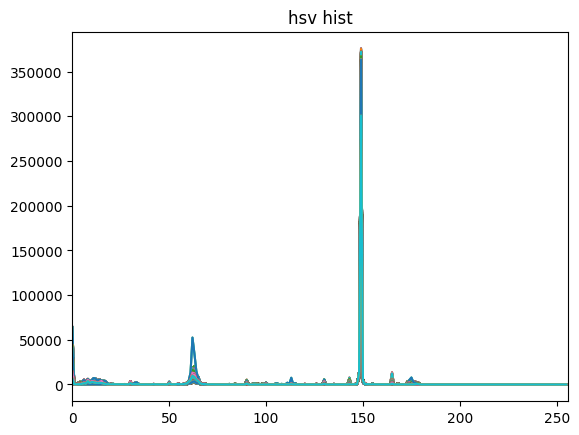

In [7]:
def show_histogram(img, title, xmax, ymax=None):
    color = ('h', 's', 'v')
    for i, clr in enumerate(color):
        histr = cv2.calcHist([img[:,:,0]], channels=[0],
                             mask=None, histSize=[256], ranges=[0, 256])
        plt.plot(histr)
        plt.xlim([0, xmax])
        if ymax != None:
            plt.ylim([0, ymax])
    plt.title(title)

cap1 = cv2.VideoCapture('./data/video_src.mp4')
cap2 = cv2.VideoCapture('./data/video_bg.mp4')

frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print('frame_cnt1:', frame_cnt1)
print('frame_cnt2:', frame_cnt2)

fps = cap1.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)

# 합성 여부 플래그
do_composit = True
while True:
    ret1, frame1 = cap1.read()

    if not ret1:
        break

    if do_composit:
        ret2, frame2 = cap2.read()

        if not ret2:
            break

        hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)

        show_histogram(hsv, 'hsv hist', 256)
        mask = cv2.inRange(hsv, (140, 90, 0), (170, 255, 255))
        cv2.copyTo(frame2, mask, frame1)

    cv2.imshow('frame', frame1)
    cv2.imshow('mask', mask)
    plt.plot()
    key = cv2.waitKey(delay)

    if key == ord(' '):
        do_composit = not do_composit
    elif key == 27:
        break

cap1.release()
cap2.release()
cv2.destroyAllWindows()